In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


In [2]:
with open('data_batch_1', 'rb') as f:
    dat = pickle.load(f, encoding='bytes')

In [3]:
dat.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
labels = dat[b'labels']
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [5]:
dat[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [28]:
dat[b'data'].shape

(10000, 3072)

In [29]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(dat[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

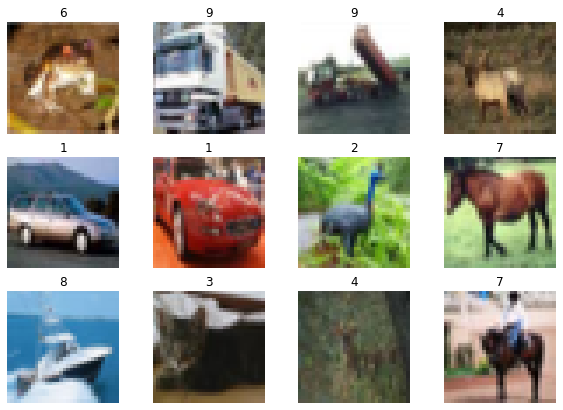

In [30]:
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

In [31]:
with open('batches.meta', 'rb') as f:
    label_strings = pickle.load(f, encoding='bytes')

In [32]:
label_strings

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [33]:
actual_labels = [label.decode() for label in label_strings[b'label_names']]
actual_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [34]:
for lab in labels[:12]:
    print(actual_labels[lab], end=', ')

frog, truck, truck, deer, automobile, automobile, bird, horse, ship, cat, deer, horse, 

In [35]:
one_hot_labels = np.zeros((images.shape[0], 10))

for idx, lab in enumerate(labels):
    one_hot_labels[idx, lab] = 1

In [36]:
one_hot_labels[:12]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [37]:
images = images.mean(axis=-1)

In [38]:
images[0]

array([[ 61.33333333,  44.66666667,  47.        , ..., 132.66666667,
        126.33333333, 125.        ],
       [ 18.66666667,   0.        ,   8.66666667, ...,  88.66666667,
         84.        ,  88.66666667],
       [ 23.33333333,   7.66666667,  28.        , ...,  84.        ,
         84.66666667,  74.66666667],
       ...,
       [158.        , 129.33333333, 128.33333333, ..., 121.        ,
         31.33333333,  35.66666667],
       [138.33333333, 112.66666667, 120.        , ..., 142.        ,
         64.33333333,  56.66666667],
       [145.66666667, 130.33333333, 136.        , ..., 180.        ,
        117.66666667,  95.66666667]])

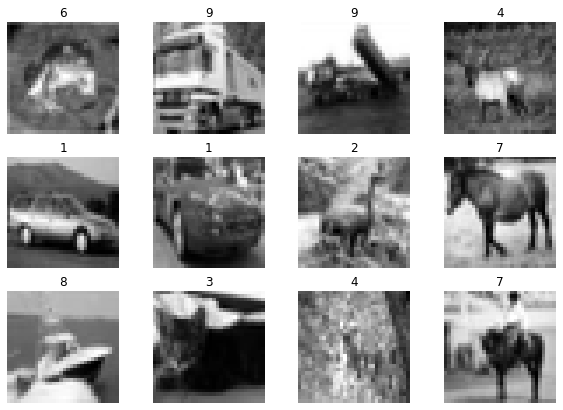

In [39]:
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

In [40]:
images /= 255.

In [41]:
images[0]

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.52026144, 0.49542484,
        0.49019608],
       [0.07320261, 0.        , 0.03398693, ..., 0.34771242, 0.32941176,
        0.34771242],
       [0.09150327, 0.03006536, 0.10980392, ..., 0.32941176, 0.33202614,
        0.29281046],
       ...,
       [0.61960784, 0.50718954, 0.50326797, ..., 0.4745098 , 0.12287582,
        0.13986928],
       [0.54248366, 0.44183007, 0.47058824, ..., 0.55686275, 0.25228758,
        0.22222222],
       [0.57124183, 0.51111111, 0.53333333, ..., 0.70588235, 0.46143791,
        0.3751634 ]])

In [42]:
images = images.reshape((-1, 32 ** 2))

In [43]:
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

In [44]:
x_train = images[:7000]
y_train = one_hot_labels[:7000]

x_test = images[7000:]
y_test = one_hot_labels[7000:]

In [45]:
model = Sequential([
    Dense(500, input_shape=(1024,), activation='relu'),
    Dense(10, activation='softmax')
    
])

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
219/219 [==============================] - 2s 7ms/step - loss: 2.1961 - accuracy: 0.1841 - val_loss: 2.1435 - val_accuracy: 0.1967
Epoch 2/100
219/219 [==============================] - 1s 6ms/step - loss: 2.0943 - accuracy: 0.2409 - val_loss: 2.0891 - val_accuracy: 0.2587
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 2.0504 - accuracy: 0.2604 - val_loss: 2.0427 - val_accuracy: 0.2807
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 2.0216 - accuracy: 0.2844 - val_loss: 2.0221 - val_accuracy: 0.2887
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 1.9963 - accuracy: 0.2934 - val_loss: 2.0122 - val_accuracy: 0.2947
Epoch 6/100
219/219 [==============================] - 1s 5ms/step - loss: 1.9723 - accuracy: 0.3026 - val_loss: 2.0222 - val_accuracy: 0.2723
Epoch 7/100
219/219 [==============================] - 1s 6ms/step - loss: 1.9539 - accuracy: 0.3106 - val_loss: 1.9819 - val_accuracy: 0.3053

Epoch 58/100
219/219 [==============================] - 1s 5ms/step - loss: 1.4358 - accuracy: 0.5183 - val_loss: 1.7974 - val_accuracy: 0.3837
Epoch 59/100
219/219 [==============================] - 1s 6ms/step - loss: 1.4288 - accuracy: 0.5196 - val_loss: 1.7931 - val_accuracy: 0.3720
Epoch 60/100
219/219 [==============================] - 1s 5ms/step - loss: 1.4209 - accuracy: 0.5217 - val_loss: 1.7868 - val_accuracy: 0.3820
Epoch 61/100
219/219 [==============================] - 1s 5ms/step - loss: 1.4098 - accuracy: 0.5270 - val_loss: 1.7903 - val_accuracy: 0.3720
Epoch 62/100
219/219 [==============================] - 1s 5ms/step - loss: 1.4042 - accuracy: 0.5299 - val_loss: 1.8223 - val_accuracy: 0.3647
Epoch 63/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3967 - accuracy: 0.5211 - val_loss: 1.8393 - val_accuracy: 0.3637
Epoch 64/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3897 - accuracy: 0.5319 - val_loss: 1.7939 - val_accuracy:

In [48]:
predictions = model.predict(images[:12])
predictions

array([[1.20807216e-01, 7.77252913e-02, 5.98278036e-03, 5.98291568e-02,
        2.29671195e-01, 9.61516947e-02, 1.54692098e-01, 2.21175626e-02,
        2.27850571e-01, 5.17242169e-03],
       [1.13536390e-02, 4.14082974e-01, 1.20412940e-02, 2.33352445e-02,
        1.32229459e-03, 1.88060760e-01, 1.64424547e-03, 1.73599999e-02,
        1.13206096e-01, 2.17593417e-01],
       [2.00346415e-03, 4.45531774e-03, 6.35427787e-05, 4.07714717e-04,
        1.12608064e-03, 3.91403504e-04, 3.70331181e-05, 6.53364323e-03,
        2.07715505e-03, 9.82904673e-01],
       [1.60668552e-01, 6.48271665e-02, 5.17776422e-02, 3.56913581e-02,
        1.83778480e-01, 1.01667628e-01, 2.31812775e-01, 3.62233706e-02,
        1.27640322e-01, 5.91276446e-03],
       [9.53749493e-02, 6.50095046e-01, 1.39326818e-04, 1.92418665e-04,
        4.23480989e-03, 2.28779321e-03, 6.89584567e-06, 7.06037646e-03,
        2.14585081e-01, 2.60231998e-02],
       [1.80646554e-02, 4.46960628e-01, 5.36133461e-02, 4.72200438e-02,
   

In [49]:
np.argmax(predictions, axis=1)

array([4, 1, 9, 6, 1, 1, 2, 7, 8, 7, 4, 8], dtype=int64)

In [50]:
labels[:12]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7]